# Comparing zonal stats for people vs lights by country

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# Plotly for interactive plotting
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

%matplotlib inline

Used QGIS to do zonal stats using Natural Earth countries shapefile and both the lights and people rasters:

In [2]:
geodf = gpd.read_file('countries_with_population.geojson')

View the data.

In [3]:
geodf.head()

,fid,scalerank,featurecla,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,...,MIN_ZOOM,MIN_LABEL,MAX_LABEL,sum,GPW,BM_sum,BM,area,perimeter,geometry
0,1,1,Admin-0 country,3.0,Afghanistan,AFG,0.0,2.0,Sovereign country,Afghanistan,...,0.0,3.0,7.0,2.754120e+07,27541201,2014.200038,2014,63.593500,46.043309,(POLYGON ((61.21081709172574 35.65007233330923...
1,2,1,Admin-0 country,3.0,Angola,AGO,0.0,2.0,Sovereign country,Angola,...,0.0,3.0,7.0,2.552442e+07,25524423,3829.611838,3830,103.599439,54.986811,(POLYGON ((23.90415368011818 -11.7222815894063...
2,3,1,Admin-0 country,6.0,Albania,ALB,0.0,2.0,Sovereign country,Albania,...,0.0,5.0,10.0,2.766172e+06,2766172,1030.054924,1030,3.185163,8.146598,"(POLYGON ((21.0200403174764 40.84272695572588,..."
3,4,1,Admin-0 country,4.0,United Arab Emirates,ARE,0.0,2.0,Sovereign country,United Arab Emirates,...,0.0,4.0,9.0,6.786466e+06,6786466,14241.623780,14242,7.095047,14.574017,(POLYGON ((51.57951867046327 24.24549713795111...
4,5,1,Admin-0 country,2.0,Argentina,ARG,0.0,2.0,Sovereign country,Argentina,...,0.0,2.0,7.0,4.217470e+07,42174700,36244.898752,36245,278.923392,113.624468,"(POLYGON ((-66.95992 -54.89681, -67.56244 -54...."


# Absolute population by country

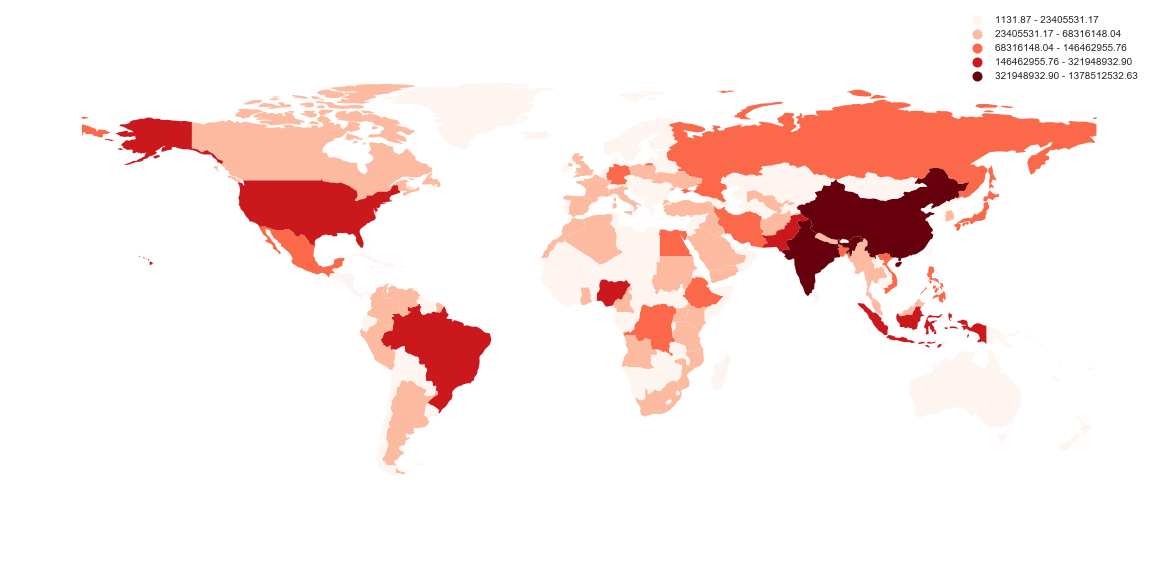

In [4]:
f, ax = plt.subplots(1, figsize=(20,10))
geodf.plot(ax=ax, linewidth=0, column="sum", cmap="Reds", scheme='fisher_jenks', legend=True)
ax.set_axis_off()
plt.axis('equal');

# Absolute night light luminosity per country

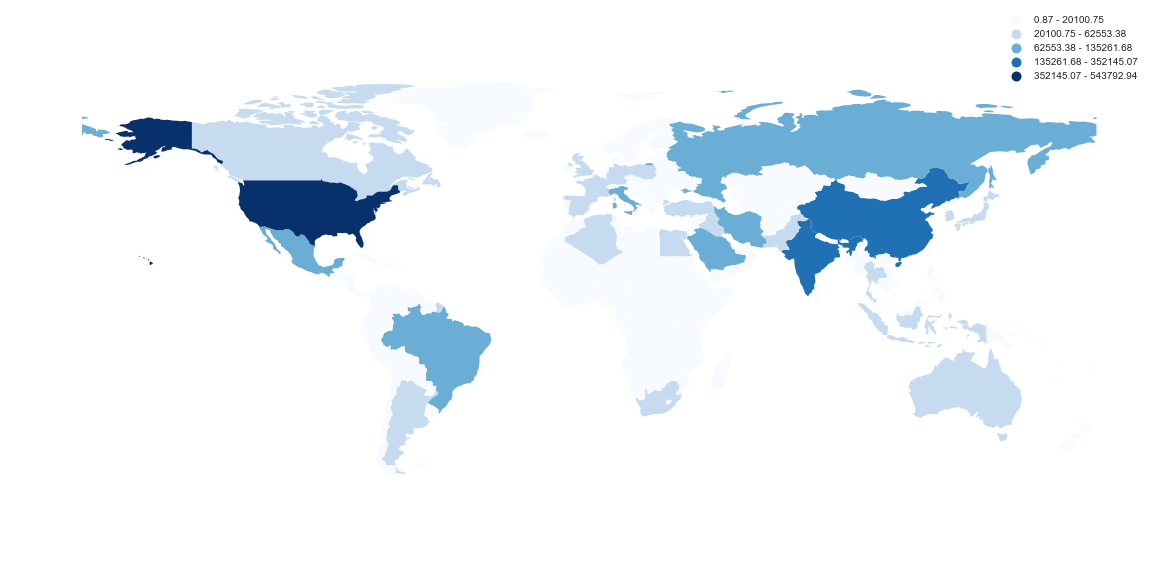

In [5]:
f, ax = plt.subplots(1, figsize=(20,10))
geodf.plot(ax=ax, linewidth=0, column="BM_sum", cmap="Blues", scheme='fisher_jenks', legend=True)
ax.set_axis_off()
plt.axis('equal');

# Calculate lights per capita

In [6]:
geodf['lights_per_capita'] = geodf['BM_sum'] / geodf['sum']

In [7]:
geodf.head()

,fid,scalerank,featurecla,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,...,MIN_LABEL,MAX_LABEL,sum,GPW,BM_sum,BM,area,perimeter,geometry,lights_per_capita
0,1,1,Admin-0 country,3.0,Afghanistan,AFG,0.0,2.0,Sovereign country,Afghanistan,...,3.0,7.0,2.754120e+07,27541201,2014.200038,2014,63.593500,46.043309,(POLYGON ((61.21081709172574 35.65007233330923...,0.000073
1,2,1,Admin-0 country,3.0,Angola,AGO,0.0,2.0,Sovereign country,Angola,...,3.0,7.0,2.552442e+07,25524423,3829.611838,3830,103.599439,54.986811,(POLYGON ((23.90415368011818 -11.7222815894063...,0.000150
2,3,1,Admin-0 country,6.0,Albania,ALB,0.0,2.0,Sovereign country,Albania,...,5.0,10.0,2.766172e+06,2766172,1030.054924,1030,3.185163,8.146598,"(POLYGON ((21.0200403174764 40.84272695572588,...",0.000372
3,4,1,Admin-0 country,4.0,United Arab Emirates,ARE,0.0,2.0,Sovereign country,United Arab Emirates,...,4.0,9.0,6.786466e+06,6786466,14241.623780,14242,7.095047,14.574017,(POLYGON ((51.57951867046327 24.24549713795111...,0.002099
4,5,1,Admin-0 country,2.0,Argentina,ARG,0.0,2.0,Sovereign country,Argentina,...,2.0,7.0,4.217470e+07,42174700,36244.898752,36245,278.923392,113.624468,"(POLYGON ((-66.95992 -54.89681, -67.56244 -54....",0.000859


# Lights per capita by country

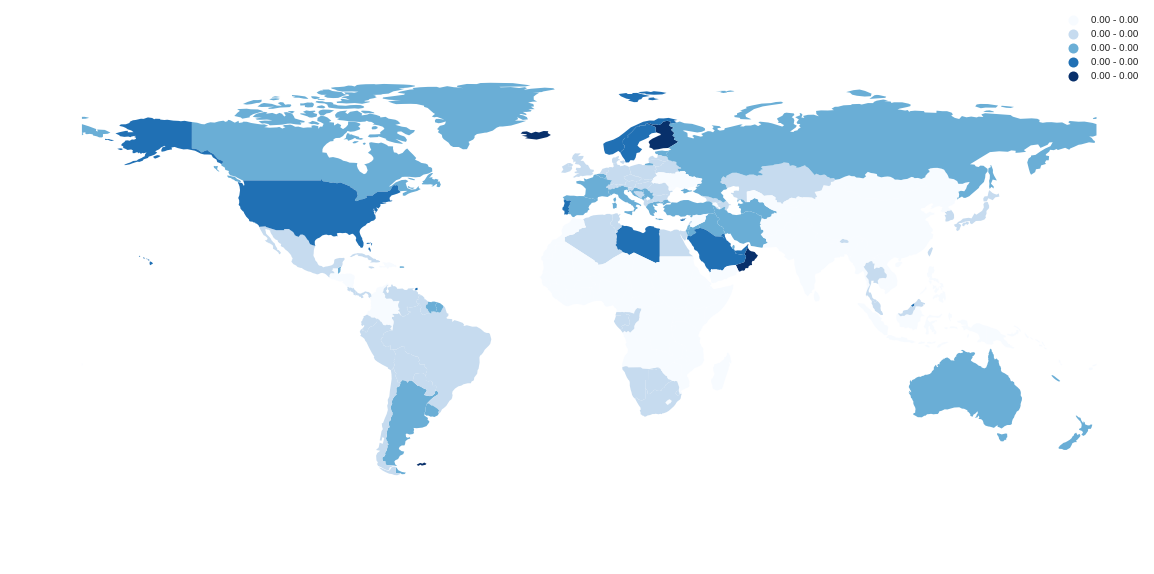

In [8]:
f, ax = plt.subplots(1, figsize=(20,10))
geodf.plot(ax=ax, linewidth=0, column="lights_per_capita", cmap="Blues", scheme='fisher_jenks', legend=True)
ax.set_axis_off()
plt.axis('equal');

# Countries sorted by lights per capita (descending order)

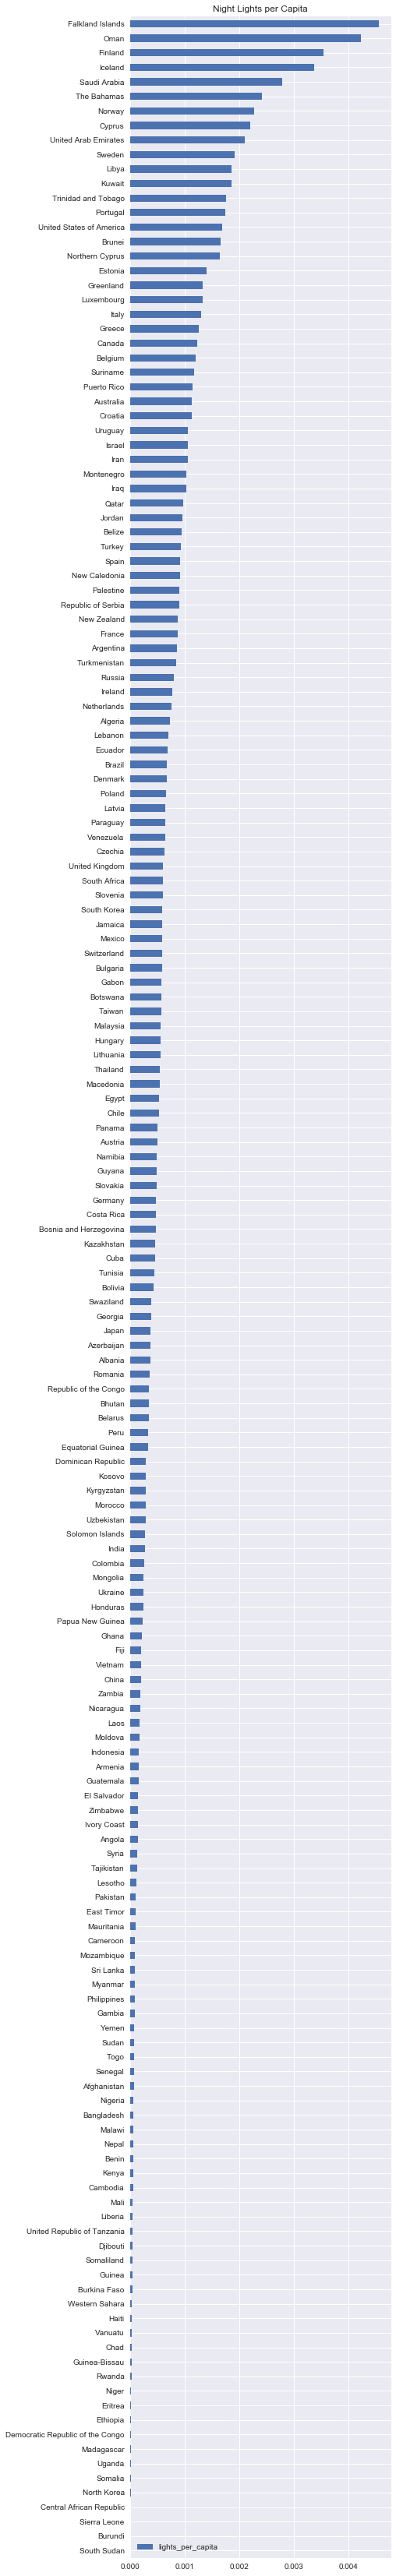

In [9]:
country_totals = pd.DataFrame()
country_totals['lights_per_capita'] = geodf['lights_per_capita']
country_totals.index = geodf['ADMIN']
del country_totals.index.name

country_totals.sort_values(by='lights_per_capita').plot(kind='barh', figsize=(6,60), title='Night Lights per Capita');

# Plot Lights vs. People (both on a linear scale)

Make scatter plot of people (horizontal axis) vs. lights (vertical axis).

In [10]:
people = geodf['sum']
lights = geodf['BM_sum']
labels = geodf['ADMIN']

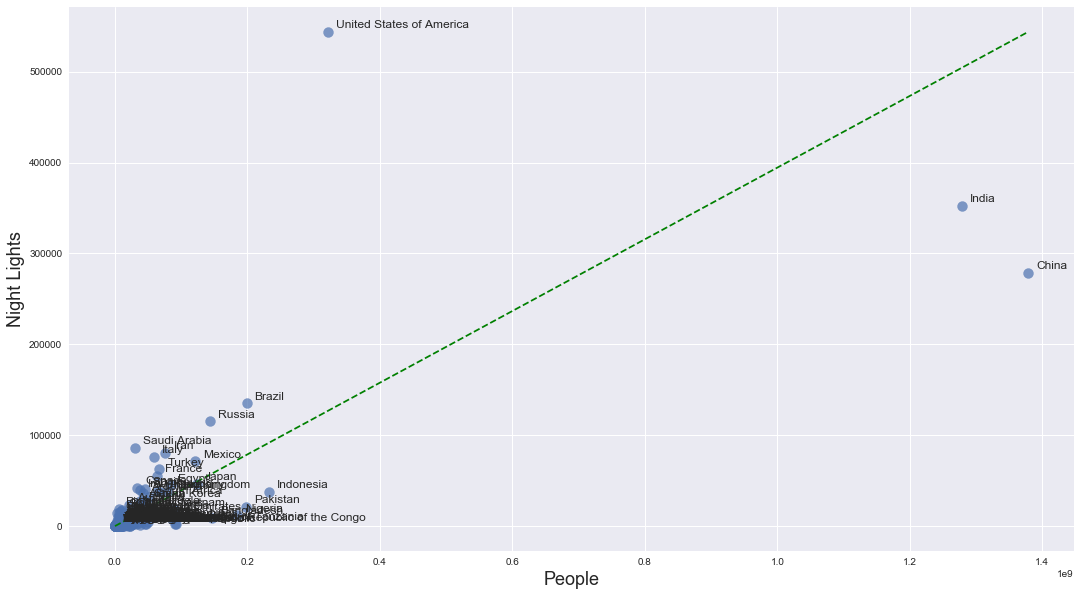

In [11]:
fig, ax = plt.subplots(figsize=(18,10))
plt.scatter(people, lights, s=100, alpha=0.7)

# create dashed line from (0,0) to (max, max)
N = 100
x_ = np.linspace(0, people.max(), N)
y_ = np.linspace(0, lights.max(), N)
plt.plot(x_, y_, 'g--')

# annotate labels
horizontal_label_offset = 12000000
vertical_label_offset = -4000
for i, text in enumerate(labels):
    ax.annotate(text,
                (people[i]+horizontal_label_offset,
                 lights[i]-vertical_label_offset),
                fontsize=12)
    
# label the axes
plt.xlabel("People", fontsize=18)
plt.ylabel("Night Lights", fontsize=18);

# Plot Lights (linear scale) vs People (log scale)

For more about the use of the log scale: https://en.wikipedia.org/wiki/Logarithmic_scale

Make an interactive scatter plot using a log scale on just the horizontal axis (people).

In [12]:
fig = {
    'data': [
        {
            'x': people, 
            'y': lights, 
            'text': labels, 
            'mode': 'markers'}
    ],
    'layout': {
        'xaxis': {'title': 'Population (Log Scale)', 'type': 'log'},
        'yaxis': {'title': "Night Lights", 'type': 'linear'}
    }
}

py.iplot(fig)

# Plot Lights vs. People (both on log scale)

Make an interactive scatter plot using a log scale on both the vertical axis (lights) and the horizontal axis (people).

In [13]:
fig = {
    'data': [
        {
            'x': people, 
            'y': lights, 
            'text': labels, 
            'mode': 'markers'}
    ],
    'layout': {
        'xaxis': {'title': 'Population (Log Scale)', 'type': 'log'},
        'yaxis': {'title': "Night Lights (Log Scale)", 'type': 'log'}
    }
}

py.iplot(fig)

# Luminosity Model

In [14]:
from sklearn import linear_model

In [15]:
X = np.log10(np.array(people).reshape(len(people), 1))
y = np.log10(np.array(lights).reshape(len(lights), 1))

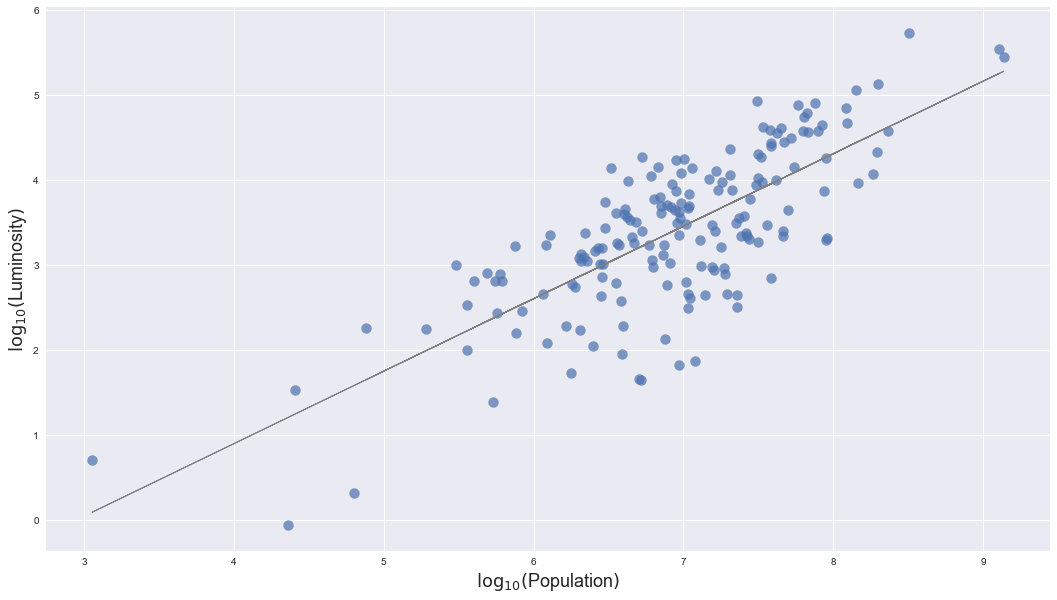

In [16]:
fig, ax = plt.subplots(figsize=(18,10))
plt.scatter(X, y, s=100, alpha=0.7)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X, ols.coef_ * X + ols.intercept_, linewidth=1, color='gray')

# label the axes
plt.xlabel("$\log_{10}($Population$)$", fontsize=18)
plt.ylabel("$\log_{10}($Luminosity$)$", fontsize=18);

In [17]:
slope = ols.coef_.ravel()[0]
intercept = ols.intercept_.ravel()[0]
print "regression coefficient =", slope
print "regression intercept = ", intercept

regression coefficient = 0.852613362626
regression intercept =  -2.50952998638


$$ \Large{\text{Luminosity} \approx 10^{(0.85 \ \times \ \log_{10}(\text{Population}) \ -\ 2.5)}}$$

In [18]:
def luminosity_model(population):
    luminosity = 10 ** (slope * np.log10(population) + intercept)
    return luminosity

Test out the model.

In [19]:
america_pop = geodf[geodf['ADMIN'] == "United States of America"]['sum']
america_lights = geodf[geodf['ADMIN'] == "United States of America"]['BM_sum']

china_pop = geodf[geodf['ADMIN'] == "China"]['sum']
china_lights = geodf[geodf['ADMIN'] == "China"]['BM_sum']

india_pop = geodf[geodf['ADMIN'] == "India"]['sum']
india_lights = geodf[geodf['ADMIN'] == "India"]['BM_sum']

south_sudan_pop = geodf[geodf['ADMIN'] == "South Sudan"]['sum']
south_sudan_lights = geodf[geodf['ADMIN'] == "South Sudan"]['BM_sum']

In [20]:
print "America's luminosity is ", round(america_lights / luminosity_model(america_pop),2), "x what the model says it should be"
print "China's luminosity is ", round(china_lights / luminosity_model(china_pop),2), "x what the model says it should be"
print "India's luminosity is ", round(india_lights / luminosity_model(india_pop),2), "x what the model says it should be"
print "South Sudan's luminosity is ", round(south_sudan_lights / luminosity_model(south_sudan_pop),2), "x what the model says it should be"

America's luminosity is  9.8 x what the model says it should be
China's luminosity is  1.45 x what the model says it should be
India's luminosity is  1.96 x what the model says it should be
South Sudan's luminosity is  0.02 x what the model says it should be


# Ratio of Expected Luminosity vs. Actual Luminosity by Country

In [21]:
results = pd.DataFrame()
results['expected_lights'] = geodf['sum'].apply(luminosity_model)
results['actual_lights'] = geodf['BM_sum']
results['actual_to_expected_lights'] = results['actual_lights'] / results['expected_lights']
results.index = geodf['ADMIN']

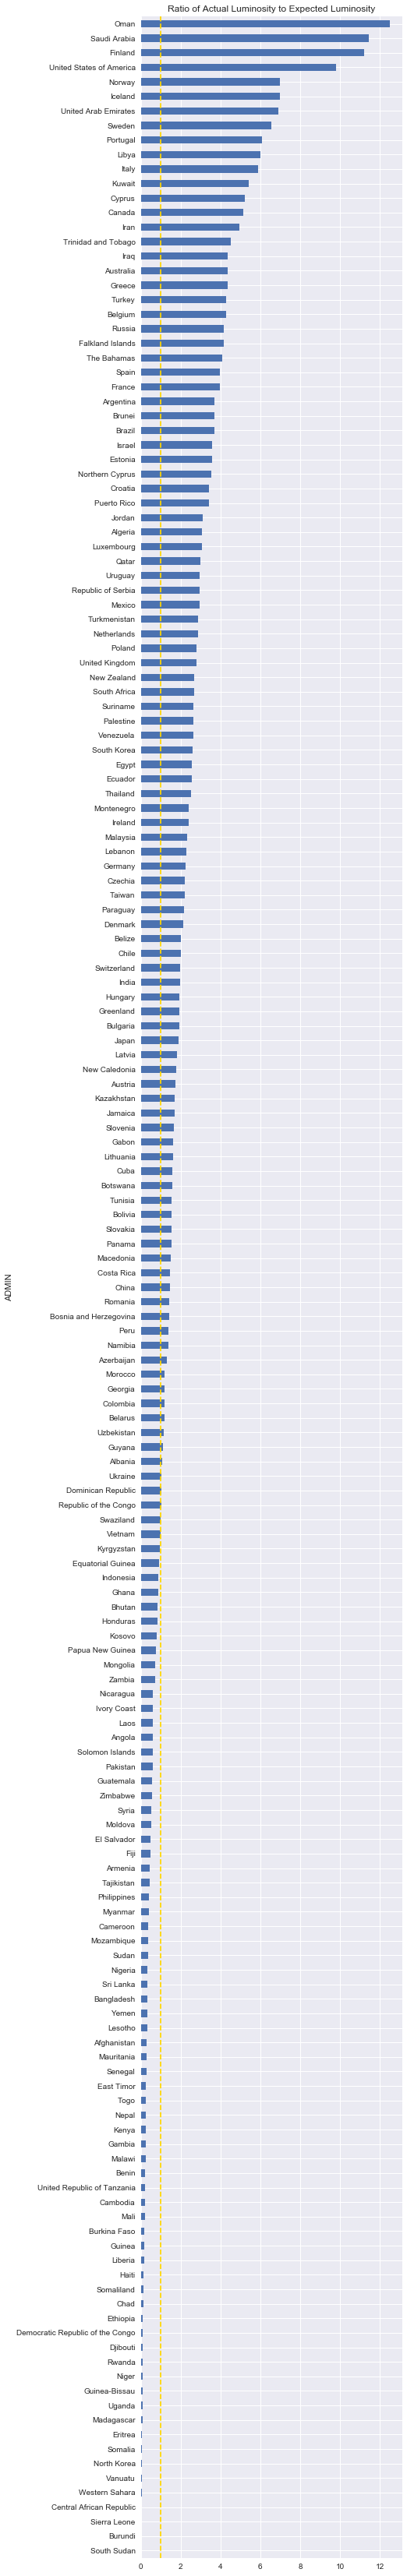

In [23]:
ax = results[['actual_to_expected_lights']].sort_values(by='actual_to_expected_lights').plot(kind='barh',
        figsize=(6,60), title='Ratio of Actual Luminosity to Expected Luminosity', legend=False)

plt.axvline(x=1, color='gold', linestyle='--');